In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are no null values in the dataset.

# **Exploratory Data Analysis**

([<matplotlib.axis.XTick at 0x7ff3f34dfad0>,
 [Text(0, 0, '1 st owner'), Text(0, 0, '2nd owner'), Text(0, 0, '3rd owner')])

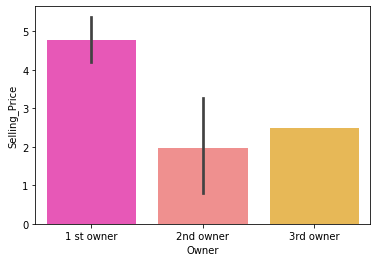

In [7]:
#lets examine the car owner types vs selling price
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='spring')
plt.xticks([0,1,2],('1 st owner','2nd owner','3rd owner'),)

1 St owner's vehiles are selling for more price

# Transmission type vs selling price

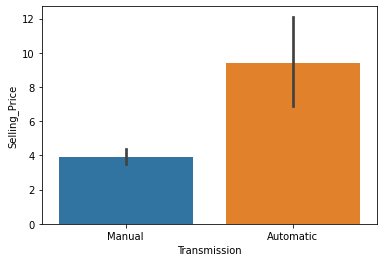

In [8]:
sns.barplot(x='Transmission',y='Selling_Price',data=df)

Automatic cars are selling for more price than manual cars

# Fuel type vs selling price

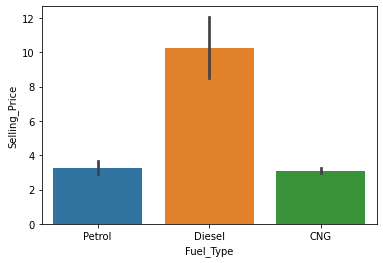

In [9]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)

Diesel cars are going for more price compared to petrol and cng

 # Seller type vs selling price

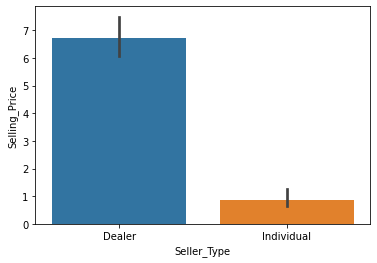

In [10]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df)

Dealer can able to sell for more price than induvidual

# Kms driven vs selling price

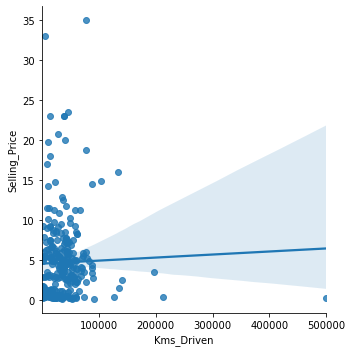

In [11]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=df)

# Vehicle age vs selling price

In [12]:
#create a new variable age 
df['age']=2020-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


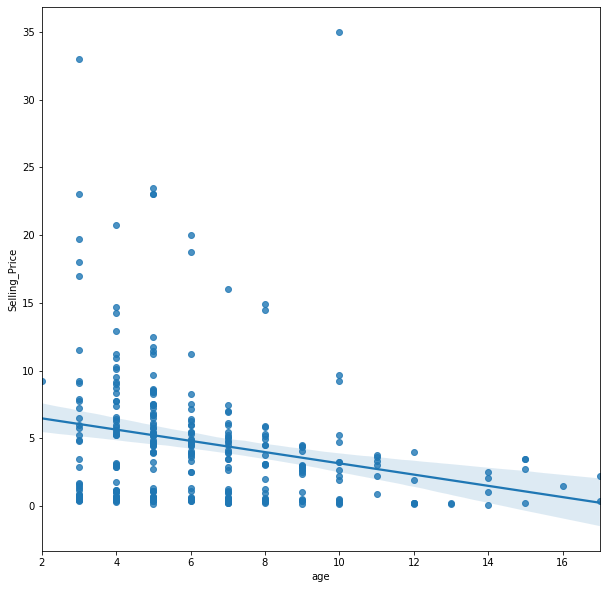

In [13]:
plt.figure(figsize=(10,10))
sns.regplot(x='age',y='Selling_Price',data=df)

# Feature Engineering

In [14]:
#using dummies to encode all catogorical features
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [15]:
#drop the year column, as we already calculated the age
df.drop(columns=['Year'],inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,6,0,1,0,1
1,sx4,4.75,9.54,43000,0,7,1,0,0,1
2,ciaz,7.25,9.85,6900,0,3,0,1,0,1
3,wagon r,2.85,4.15,5200,0,9,0,1,0,1
4,swift,4.60,6.87,42450,0,6,1,0,0,1


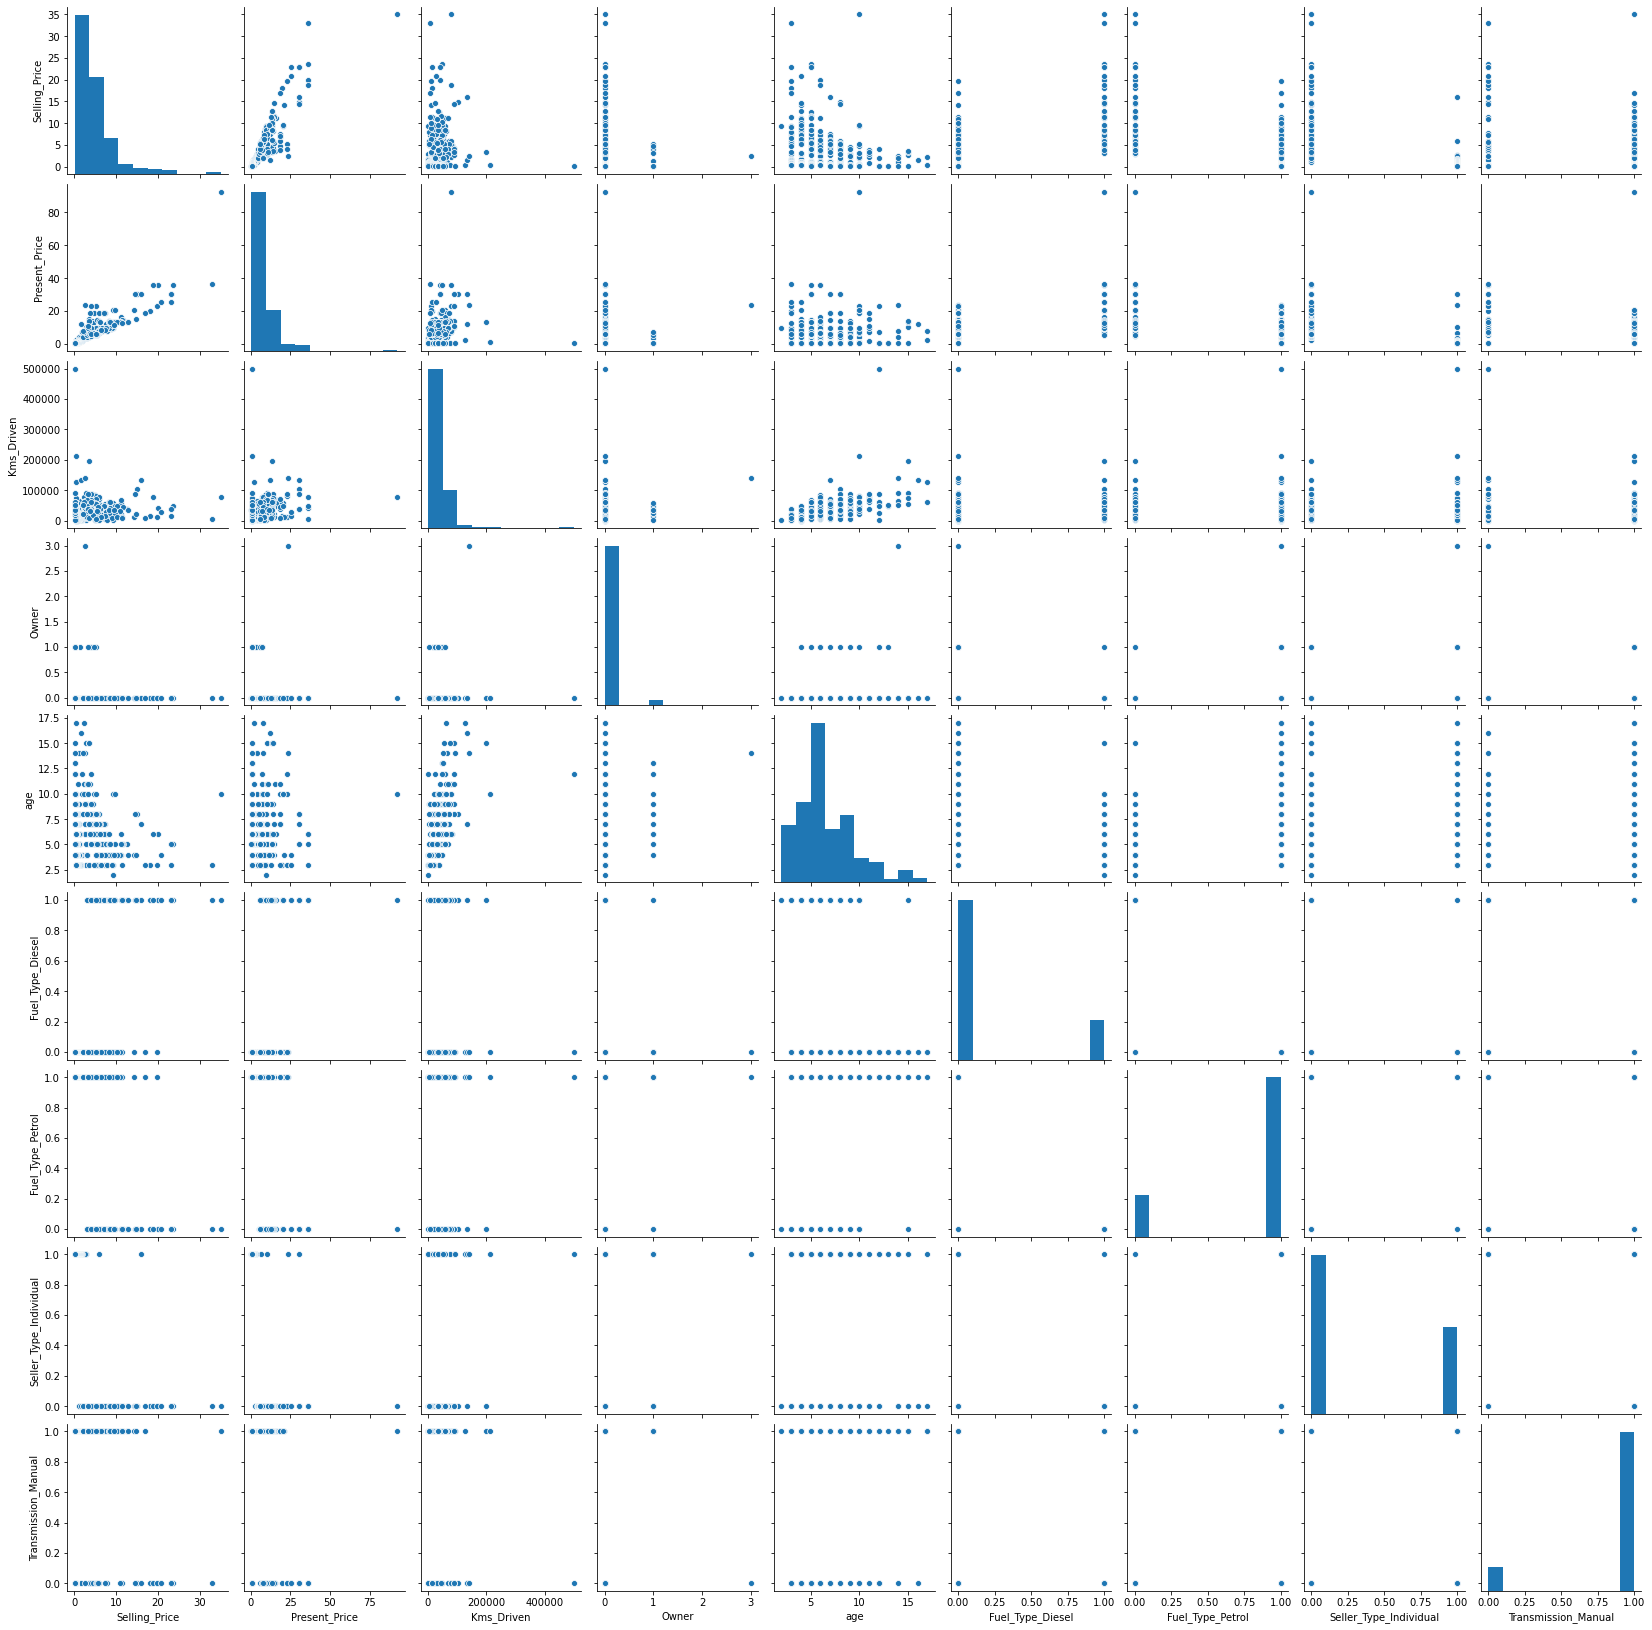

In [16]:
#understanding the realtionship between the features
sns.pairplot(df)

# Correlation heatmap

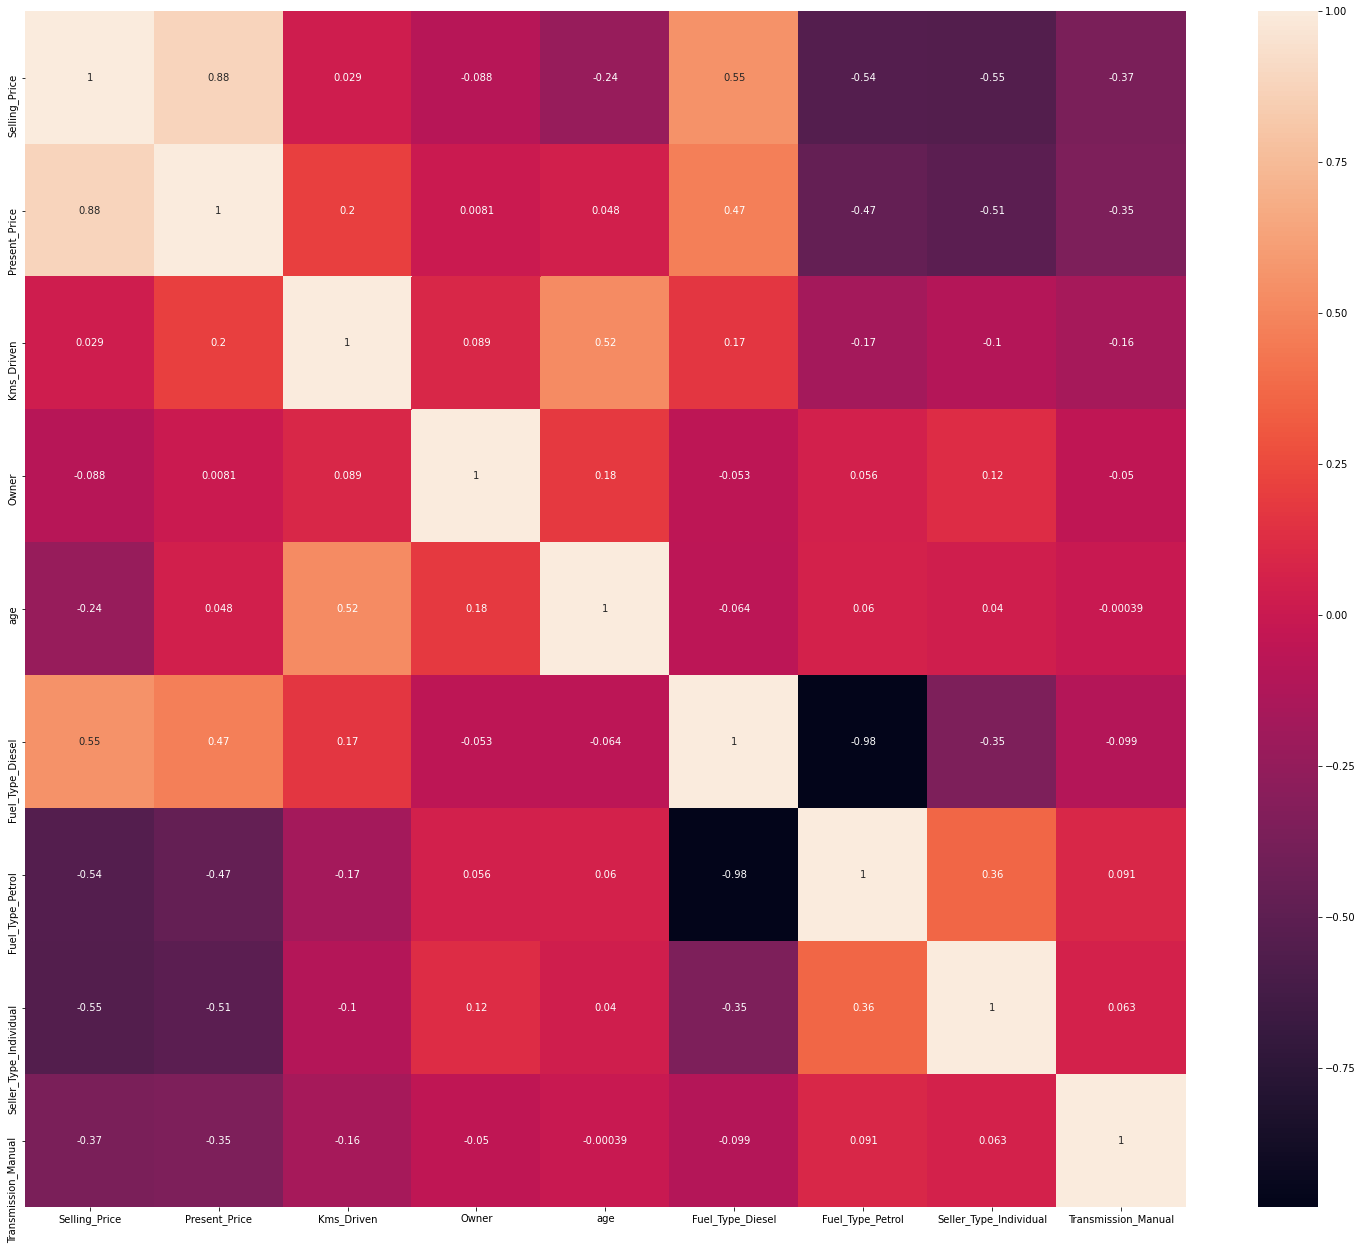

In [17]:
correlations=df.corr()
indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(df[indx].corr(),annot=True)

# Train the model

In [18]:
#scaling the model for faster convergence 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

var=['Selling_Price','Present_Price','Kms_Driven','age']

df[var]=scaler.fit_transform(df[var])

In [19]:
#droping the name columns as it has nothing do with sales price
df.drop(columns=['Car_Name'],inplace=True)

In [20]:
#split the model between train and test
from sklearn.model_selection  import train_test_split

y=df['Selling_Price']
x=df.drop(columns=['Selling_Price'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [22]:
#pring intercept of best fit line
print(lm.intercept_)

-0.03361671108985168


In [23]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=df.drop(columns=['Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price,0.918730
Kms_Driven,-0.126126
Owner,0.029070
age,-0.191240
Fuel_Type_Diesel,0.368130
Fuel_Type_Petrol,0.080059
Seller_Type_Individual,-0.066719
Transmission_Manual,-0.084433


Interpreting the coefficients:
For numerical features:

* Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.742.
* Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0411.
* Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.22764.****

# Predictions from our Model

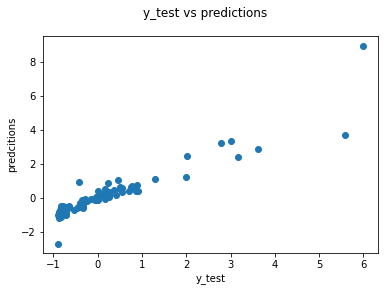

In [24]:
predictions=lm.predict(x_test)

fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

# Residual Analysis

Residual = Observed value - Predicted value

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

Text(0.5, 0.98, 'Residual Analysis')

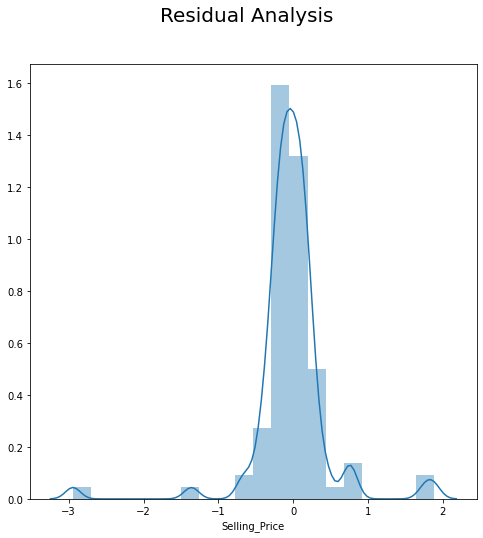

In [25]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residual')

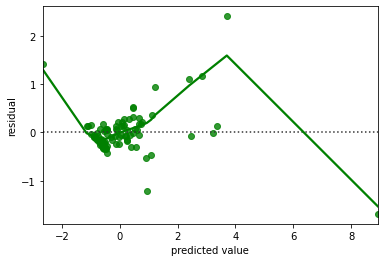

In [26]:
sns.residplot(predictions,(y_test-predictions),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')

# Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:

 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.27577734851386615
MSE: 0.2533662234247419
RMSE: 0.5033549676170306


In [28]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.8430858430188491

The low R2 valued is because of multi collinearity present between Fuel_Type_Diesel and Fuel_Type_Petrol. This can be solved by using vif

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [30]:
vif

,VIF Factor,features
0,1.827072,Present_Price
1,1.515304,Kms_Driven
2,1.088868,Owner
3,1.482030,age
4,3.162749,Fuel_Type_Diesel
5,7.912431,Fuel_Type_Petrol
6,2.236108,Seller_Type_Individual
7,8.444754,Transmission_Manual


We can drop Fuel_Type_Petrol as it is having high VIF

In [31]:
y=df['Selling_Price']
x1=df.drop(columns=['Selling_Price'],axis=1)

x1.drop(columns=['Fuel_Type_Petrol'],axis=1,inplace=True)

In [32]:
#splitting test and train data
x1_train,x1_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [33]:
lm2=LinearRegression()
lm2.fit(x1_train,y_train)

LinearRegression()

In [34]:
pred2=lm2.predict(x1_test)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 0.2552376615230191
MSE: 0.19371080824039755
RMSE: 0.4401259004425865


In [36]:
R2 = metrics.r2_score(y_test,pred2)
R2

0.6372731384170747

Better R2 value compared to original model

Text(0, 0.5, 'residual')

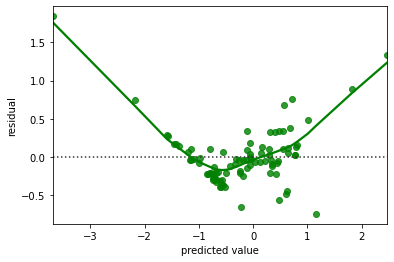

In [37]:
#plotting the residual plot
sns.residplot(pred2,(y_test-pred2),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')